# Random Number Generator
- Generate n-bit random number's
- Plot distribution

In [ ]:
# Imports
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService

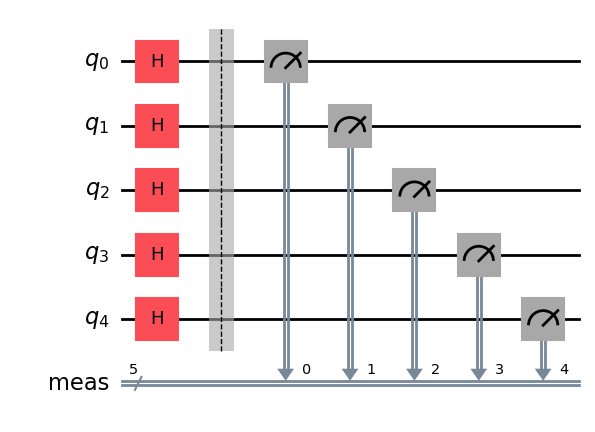

In [2]:
# Create a new circuit
qubits = 5
qc = QuantumCircuit(5)
 
# Add a Hadamard gate to qubit 0
for i in range(qubits):
    qc.h(i)

qc.measure_all()
 
# Return a drawing of the circuit using MatPlotLib ("mpl").
qc.draw("mpl")

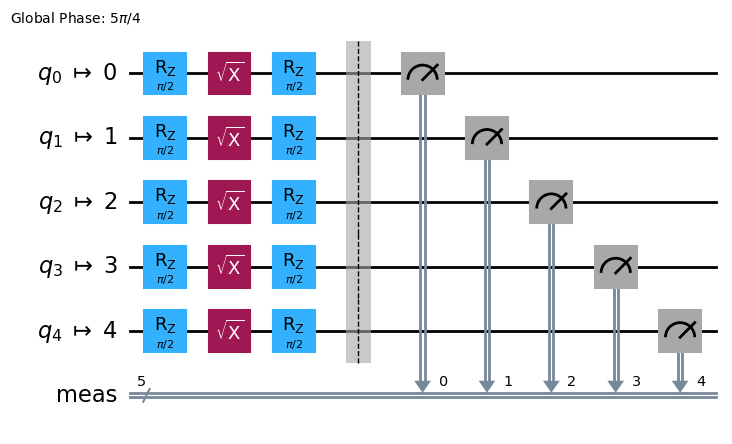

In [3]:
# Run on real device
service = QiskitRuntimeService()

backend = service.least_busy(simulator=False, operational=True)
 
# Convert to an ISA circuit and layout-mapped observables.
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_circuit = pm.run(qc)
 
# Draws what the hardware will do which is equivilent to my qc circuit
isa_circuit.draw("mpl", idle_wires=False)

In [8]:
# Construct the Estimator instance - Calcualted mean of 
sampler = Sampler(mode=backend)
sampler.options.default_shots = 100
 
# One pub, with one circuit to run against five different observables.
job = sampler.run([(isa_circuit)])

# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d4nfcgpn1t7c73dhct7g
>>> Job Status: QUEUED


In [15]:
# Results
job_id = "d4nfcgpn1t7c73dhct7g"

if service.job(job_id).status() == "DONE":
    output = service.job(job_id).result()

    # Convert bit to int
    pub_result = output[0]
    bit_result = [int(bit, 2) for bit in pub_result.data.meas.get_bitstrings()]

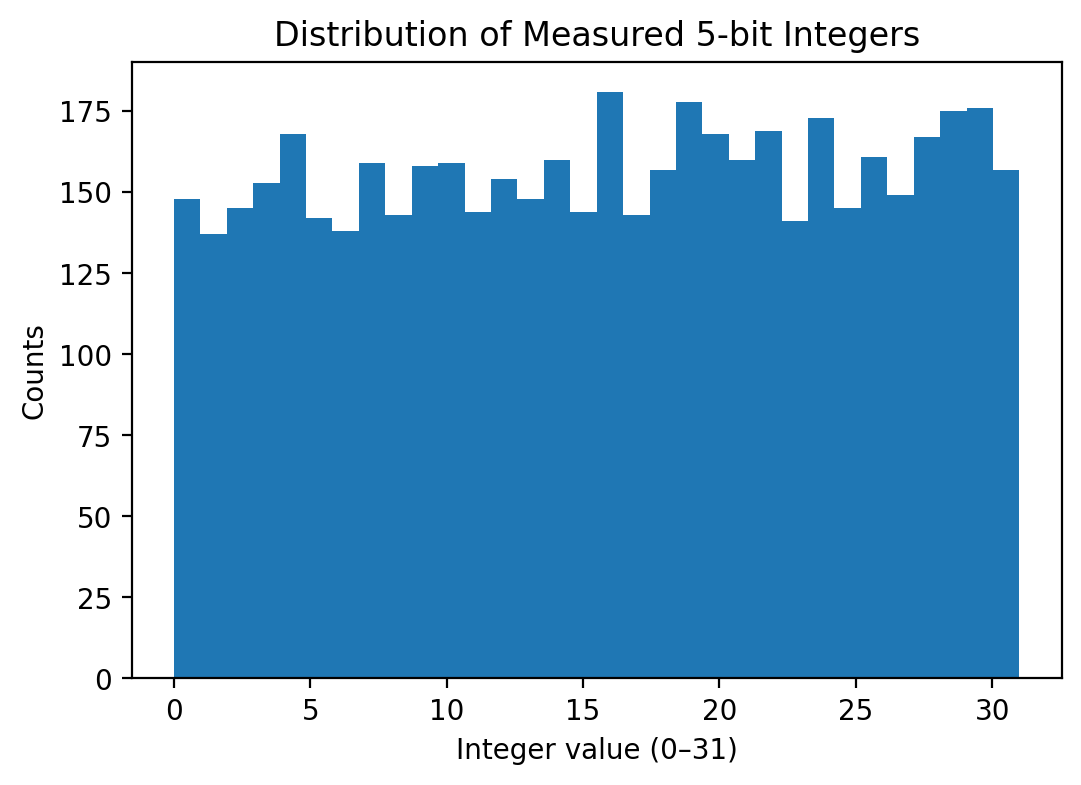

In [16]:
plt.figure(figsize=(6, 4), dpi=200)

plt.hist(bit_result, bins=2**qubits)  # do not specify colours
plt.xlabel("Integer value (0–31)")
plt.ylabel("Counts")
plt.title("Distribution of Measured 5-bit Integers")

plt.show()
